In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import OneHotEncoder

data = pd.read_csv("iris.csv")
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [9]:
X = data.drop("variety", axis=1)
y = data.loc[:, data.columns == "variety"]




In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state =42,  stratify=y)
encoder = OneHotEncoder(sparse_output=False)

y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)
model = Sequential()
model.add(Dense(10, input_shape=(4,), activation='relu')) 

#Dodanie pierwszej warstwy gęstej (Dense)
#    10 → liczba neuronów w tej warstwie.
#    input_shape=(4,) → wejście składa się z 4 liczb (jak w zbiorze Iris: długość/długość/itd.).
#    activation='relu' → funkcja aktywacji ReLU (zamienia ujemne wartości na 0, dodatnie przepuszcza).
#    Co robi ta warstwa?
#    Otrzymuje dane wejściowe (np. [5.1, 3.5, 1.4, 0.2]) i przekształca je przez 10 neuronów, każdy uczący się innych cech z danych.

model.add(Dense(10, activation='relu'))
# Druga warstwa gęsta (ukryta)
#    Kolejne 10 neuronów.
#    Nie podajemy input_shape, bo TensorFlow sam wie, że dane przychodzą z poprzedniej warstwy (10 elementów).


model.add(Dense(3, activation='softmax'))
#   3 → ponieważ mamy 3 klasy w zbiorze Iris (setosa, versicolor, virginica).
#    activation='softmax' → funkcja aktywacji, która zamienia wyjścia na prawdopodobieństwa, które sumują się do 1.
# Co robi?
#    Przetwarza dane z ostatniej warstwy ukrytej i zwraca 3 liczby np. [0.1, 0.7, 0.2].
#    To oznacza: "Model uważa, że to z prawdopodobieństwem 70% jest klasa 2".

e:\Kodilla\Projekt_1\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train_encoded, epochs=50, batch_size=5, validation_split=0.2)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3149 - loss: 1.1848 - val_accuracy: 0.3333 - val_loss: 1.0379
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3877 - loss: 1.0705 - val_accuracy: 0.6250 - val_loss: 0.9940
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6601 - loss: 0.9751 - val_accuracy: 0.6667 - val_loss: 0.9911
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7384 - loss: 0.8879 - val_accuracy: 0.5000 - val_loss: 0.9788
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5439 - loss: 0.8958 - val_accuracy: 0.4167 - val_loss: 0.9501
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5292 - loss: 0.8919 - val_accuracy: 0.4583 - val_loss: 0.9206
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4244 - loss: 0.9360 - val_accuracy: 0.4583 - val_loss: 0.9051
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5934 - loss: 0.8323 - val_accuracy: 0.4167 - val_loss

In [13]:
loss, accuracy = model.evaluate(X_test, y_test_encoded)
print(f"Test accuracy: {accuracy:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9333 - loss: 0.3307
Test accuracy: 0.93


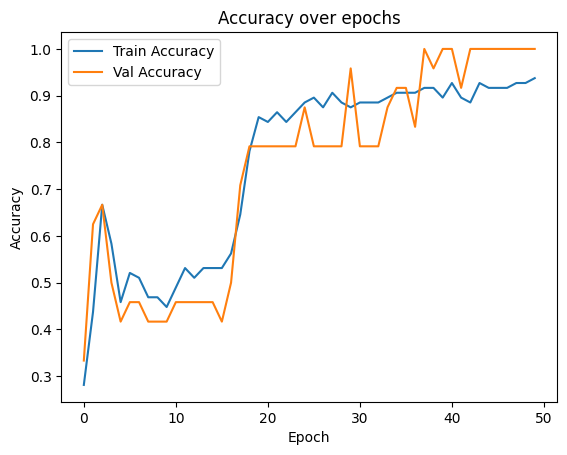

In [14]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Accuracy over epochs")
plt.show()